# EDA Analysis of German Credit Data 

-The goal of the project is to explore the dataset with pandas framework and visualize the dataset with various plot types.

-This dataset classifies people as good or bad credit risks based on the set of 20 attributes.

**a. Importing the required Libraries**

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features #Extracts the input/independent variables.
y = statlog_german_credit_data.data.targets  #Extracts the output/dependent/target variables.
  
# variable information 
print(statlog_german_credit_data.variables)


           name     role         type     demographic  \
0    Attribute1  Feature  Categorical            None   
1    Attribute2  Feature      Integer            None   
2    Attribute3  Feature  Categorical            None   
3    Attribute4  Feature  Categorical            None   
4    Attribute5  Feature      Integer            None   
5    Attribute6  Feature  Categorical            None   
6    Attribute7  Feature  Categorical           Other   
7    Attribute8  Feature      Integer            None   
8    Attribute9  Feature  Categorical  Marital Status   
9   Attribute10  Feature  Categorical            None   
10  Attribute11  Feature      Integer            None   
11  Attribute12  Feature  Categorical            None   
12  Attribute13  Feature      Integer             Age   
13  Attribute14  Feature  Categorical            None   
14  Attribute15  Feature  Categorical           Other   
15  Attribute16  Feature      Integer            None   
16  Attribute17  Feature  Categ

**b. Understanding the dataset.** 

In [6]:
statlog_german_credit_data.data.features

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [10]:
statlog_german_credit_data.data.targets 

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


-We can map the categorical variables to their meanings by the using following mapping method.

In [70]:
# Define mappings for categorical attributes
checking_account_mapping = {
    'A11': '< 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '>= 200 DM',
    'A14': 'No checking account'
}

credit_history_mapping = {
    'A30': 'No credits taken/all credits paid back',
    'A31': 'All credits paid back duly',
    'A32': 'Existing credits paid back duly till now',
    'A33': 'Delay in paying off in the past',
    'A34': 'Critical account/other credits existing'
}

# Apply mappings to the dataset
X['Attribute1'] = X['Attribute1'].map(checking_account_mapping)
X['Attribute3'] = X['Attribute3'].map(credit_history_mapping)

# Display the updated dataset
print(X.head())

# Attribute4	Attribute6	Attribute7	Attribute9	Attribute10	Attribute12	Attribute14	Attribute15	Attribute17	Attribute19	Attribute20

            Attribute1  Attribute2                                Attribute3  \
0               < 0 DM           6   Critical account/other credits existing   
1    0 <= ... < 200 DM          48  Existing credits paid back duly till now   
2  No checking account          12   Critical account/other credits existing   
3               < 0 DM          42  Existing credits paid back duly till now   
4               < 0 DM          24           Delay in paying off in the past   

  Attribute4  Attribute5 Attribute6 Attribute7  Attribute8 Attribute9  \
0        A43        1169        A65        A75           4        A93   
1        A43        5951        A61        A73           2        A92   
2        A46        2096        A61        A74           2        A93   
3        A42        7882        A61        A74           2        A93   
4        A40        4870        A61        A73           3        A93   

  Attribute10  Attribute11 Attribute12  Attribute13 Attribute14 Attribute15  \
0

C:\Users\rukdi\AppData\Local\Temp\ipykernel_27708\3360710427.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Attribute1'] = X['Attribute1'].map(checking_account_mapping)
C:\Users\rukdi\AppData\Local\Temp\ipykernel_27708\3360710427.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Attribute3'] = X['Attribute3'].map(credit_history_mapping)


In [77]:
# Inverse mappings for categorical attributes
inverse_checking_account_mapping = {v: k for k, v in checking_account_mapping.items()}
inverse_credit_history_mapping = {v: k for k, v in credit_history_mapping.items()}
# Apply inverse mappings to the dataset
X['Attribute1'] = X['Attribute1'].map(inverse_checking_account_mapping)
X['Attribute3'] = X['Attribute3'].map(inverse_credit_history_mapping)
print(X.head())

  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0        A75           4        A93        A101            4        A121   
1        A73           2        A92        A101            2        A121   
2        A74           2        A93        A101            3        A121   
3        A74           2        A93        A103            4        A122   
4        A73           3        A93        A101            4        A124   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
0           67        A1

C:\Users\rukdi\AppData\Local\Temp\ipykernel_27708\2374546646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Attribute1'] = X['Attribute1'].map(inverse_checking_account_mapping)
C:\Users\rukdi\AppData\Local\Temp\ipykernel_27708\2374546646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Attribute3'] = X['Attribute3'].map(inverse_credit_history_mapping)


In [55]:
print(y.value_counts())  # Check class distribution

class
1        700
2        300
Name: count, dtype: int64


**c. Data Cleaning.**

In [48]:
print(X.info())  # Get column data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1000 non-null  

In [65]:
X.duplicated().sum() #to check the duplicate rows.

0

**d. Exploring the DataSet**

In [29]:
X.describe()

,Attribute2,Attribute5,Attribute8,Attribute11,Attribute13,Attribute16,Attribute18
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [26]:
X.describe(include = ["object"])

,Attribute1,Attribute3,Attribute4,Attribute6,Attribute7,Attribute9,Attribute10,Attribute12,Attribute14,Attribute15,Attribute17,Attribute19,Attribute20
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


*To see the statistics on non-numeric features, we need to explicitly specify the feature types by the include parameter. We can also set include = all to output statistics on all the existing features.*



In [59]:
print(X['Attribute20'].value_counts())  # Check class distribution


Attribute20
A201    963
A202     37
Name: count, dtype: int64


96.3% of the people in this data are foreign workers , 
this is an important thing to consider when it comes marketting , security of the credit etc.

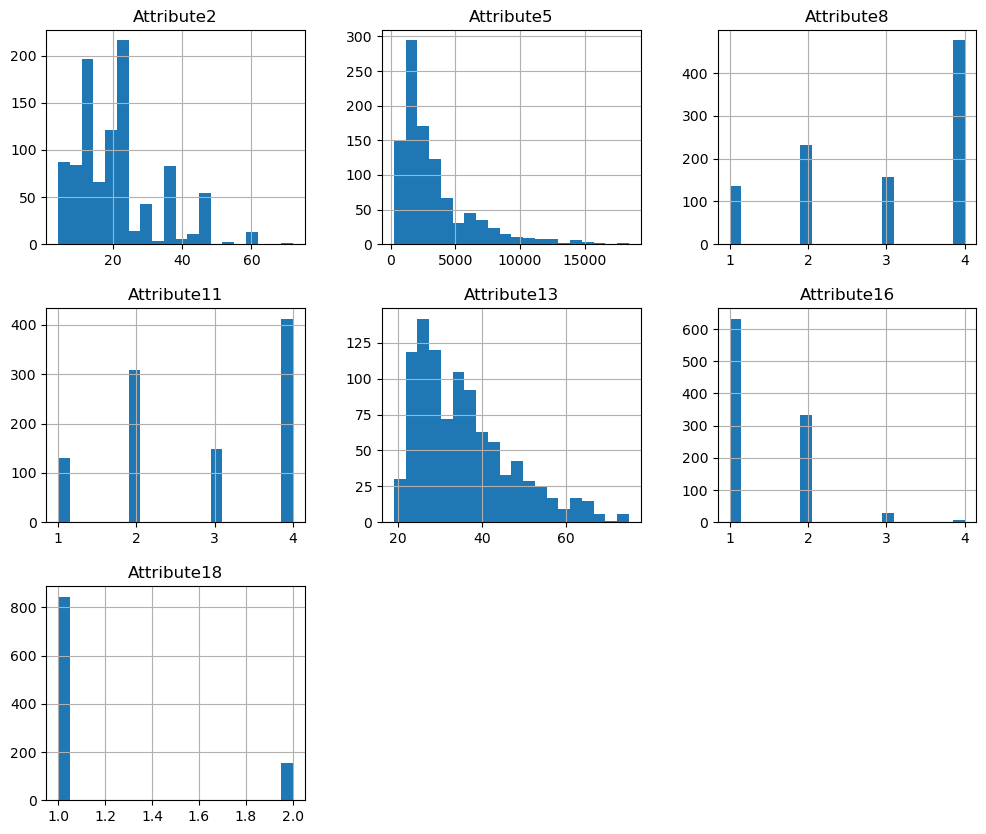

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

X.hist(figsize=(12, 10), bins=20)
plt.show()



In [97]:
X.loc[X['Attribute5']==18424]

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
915,A12,48,A30,A410,18424,A61,A73,1,A92,A101,2,A122,32,A141,A152,1,A174,1,A192,A202


In [95]:
X.loc[X['Attribute5']==15945]

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
95,A12,54,A30,A49,15945,A61,A72,3,A93,A101,4,A124,58,A143,A151,1,A173,1,A192,A201


In [28]:
print(X)

    Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0          A11           6        A34        A43        1169        A65   
1          A12          48        A32        A43        5951        A61   
2          A14          12        A34        A46        2096        A61   
3          A11          42        A32        A42        7882        A61   
4          A11          24        A33        A40        4870        A61   
..         ...         ...        ...        ...         ...        ...   
995        A14          12        A32        A42        1736        A61   
996        A11          30        A32        A41        3857        A61   
997        A14          12        A32        A43         804        A61   
998        A11          45        A32        A43        1845        A61   
999        A12          45        A34        A41        4576        A62   

    Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0          A75       

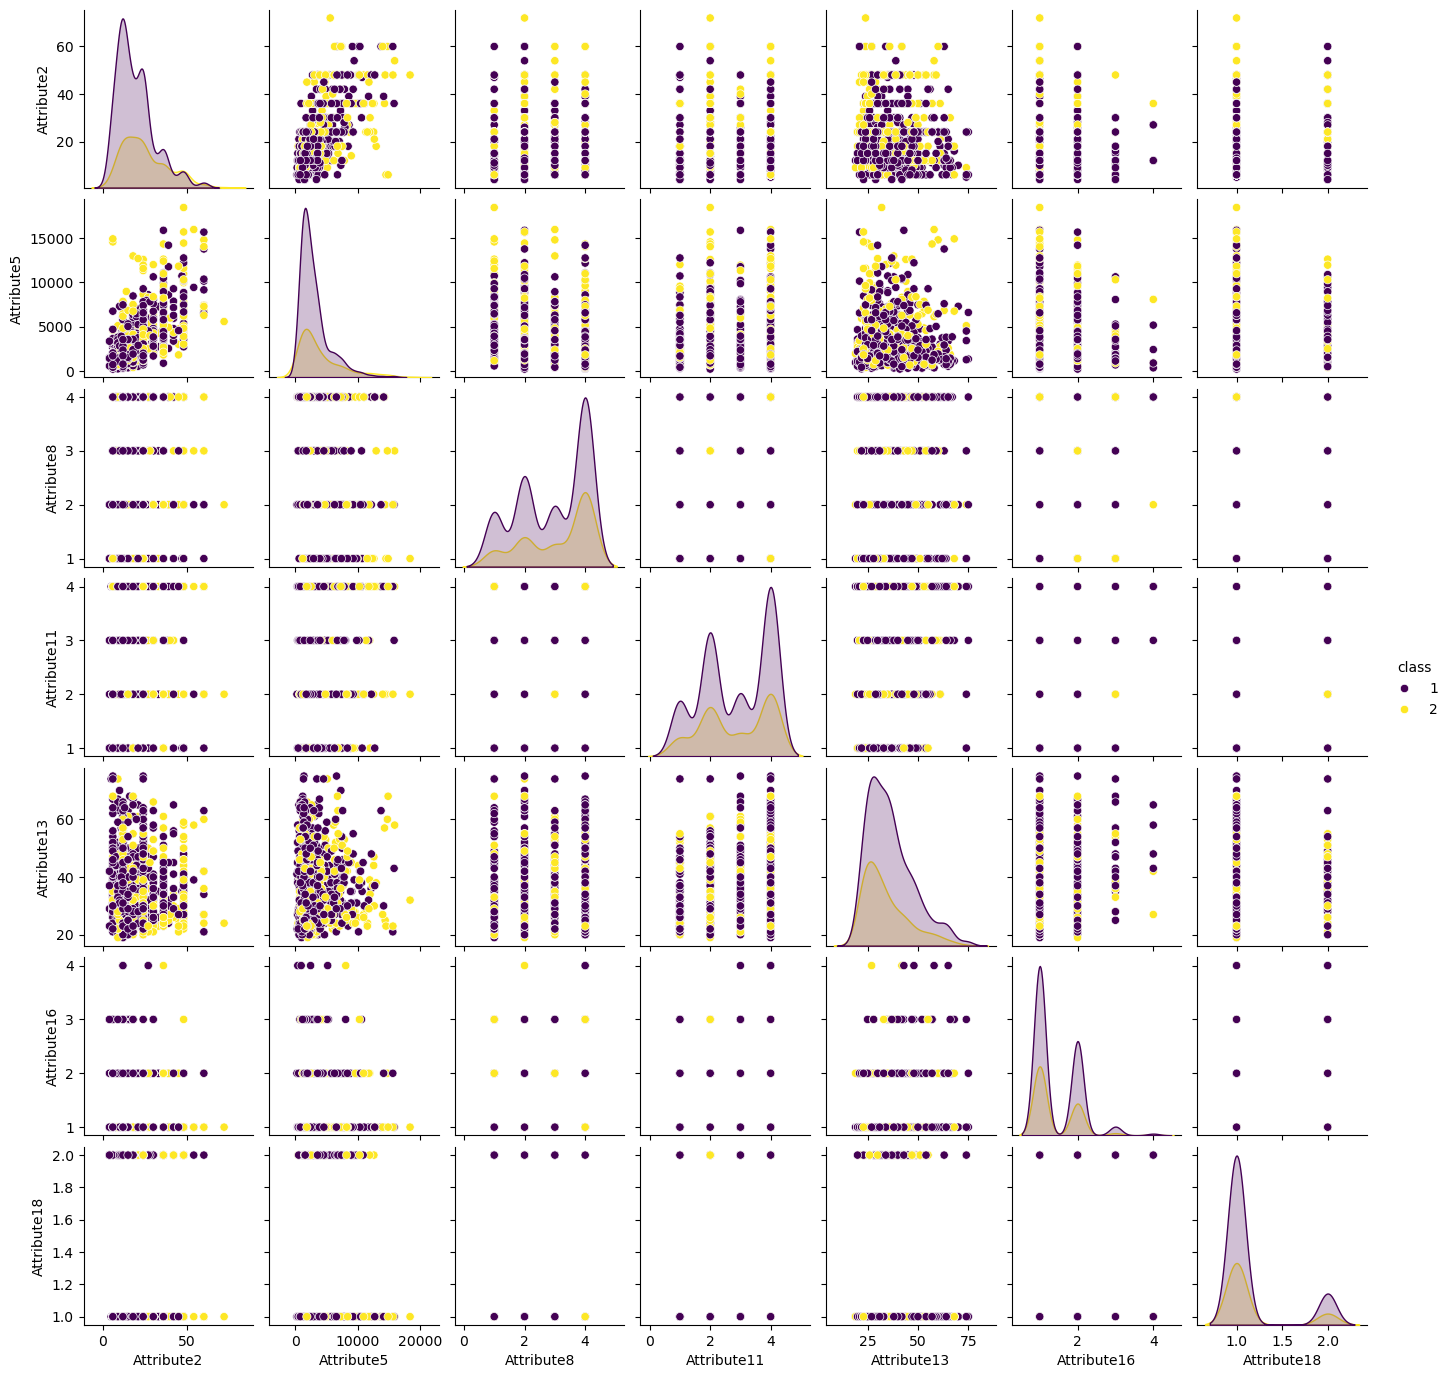

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns = ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
# Create a new DataFrame for plotting
df_plot = X[numerical_columns].copy()
df_plot['class'] = y['class']  # Include the target column
sns.pairplot(df_plot, hue='class', height=2, palette='viridis')
plt.show()

In [37]:
df_plot.corr()

,Attribute2,Attribute5,Attribute8,Attribute11,Attribute13,Attribute16,Attribute18,class
Attribute2,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
Attribute5,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
Attribute8,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
Attribute11,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
Attribute13,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
Attribute16,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
Attribute18,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
class,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000
